<br>
<p style="font-family:Lato;font-size:160%;color:rgb(30,30,130);line-height:150%;text-align:center">
        <b>DRIPs.jl: A Toolbox for Solving <br>
            Dynamic Rational Inattention Problems</b>
</p>
<br>
<br>
<p class="barcode" style="font-family:Lato;font-size:120%;color:rgb(0,0,0);line-height:150%;text-align:center">
            <b>&emsp; Hassan Afrouzi &emsp; &emsp; Choongryul Yang </b> <br>
                      Columbia U.    &emsp;  &emsp; &emsp; &emsp;                     UT Austin           
</p>   
<br>
<br>

<br>
<p style="font-family:Lato;font-size:100%;color:rgb(214,39,40);line-height:150%;text-align:center">
    <b>Cognition and Decision Lab</b>
</p>
<p style="font-family:Lato;font-size:100%;line-height:150%;text-align:center;margin-top:-20px">
    July 2020
</p>




<p style="font-family:Lato;font-size:160%;color:rgb(30,30,130);line-height:150%">
    <b>Motivation</b>
</p>

* There is growing demand for departures from full information models:
    * Households and firms make mistakes in perceiving available information


* Rational inattention offers an appealing alternative:
    * A model that introduces a cost to information acquisition
    * But has enough discipline to still generate robust predictions

* Dynamics are notoriously hard/slow to solve.
    * Both state and choice variables are distributions with endogenous support.
    * Very difficult to solve for continuous action/state sets.

* Easiest case: Linear Quadratic Gaussian (LQG) setting.
    * State and choice variables reduce to $n$-dimensional variance-covariance matrices. 


<p style="font-family:Lato;font-size:160%;color:rgb(30,30,130);line-height:150%">
    <b>Dynamic Rational Inattention Problems (DRIPs)</b>
</p>

\begin{align*}
    \min_{\{\vec{a}_t\}_{t\geq 0}} & \ \ \mathbb{E}\left[\sum_{t=0}^\infty \beta^t \bigg( (\vec{a}_t - \vec{x}_t'\mathbf{H})'(\vec{a}_t - \vec{x}_t'\mathbf{H}) - \omega \mathbb{I}(\vec{a}_t;\vec{x}_t|\vec{a}^{t-1}) \bigg) \lvert \vec{a}^{-1}\right] \\
    s.t. \ \ & \ \ 
        \vec{x}_t=\mathbf{A}\vec{x}_{t-1}+\mathbf{Q}\vec{u}_t,\quad \vec{u}_t\sim \mathcal{N}(\mathbf{0},\mathbf{I}^{k\times k}) \\
        & \ \ 
        \vec{a}^t=\vec{a}^{t-1} \cup a_t 
\end{align*}

* $\vec{a}_t\in\mathbb{R}^m$ is the vector of the agent's actions at time $t$.
* $\vec{x}_t\in\mathbb{R}^n$ is the vector of the shocks that the agent faces at time $t$.

**Why is this hard to solve?**
Solution is not necessarily interior:
\begin{align*}
    \mathbb{I}(\vec{a}^t;\vec{x}^t|\vec{a}^{t-1}) = \sum_{j=1}^n \mathbb{I}(\vec{a}_t;x_{t,j}|\vec{a}^{t-1},x_{t}^{j-1}) \\
    \mathbb{I}(\vec{a}_t;x_{t,j}|\vec{a}^{t-1},x_{t}^{j-1}) \geq 0, \forall 1\leq j\leq n
\end{align*}


<p style="font-family:Lato;font-size:160%;color:rgb(30,30,130);line-height:150%">
    <b>What's the solution?</b>
</p>


* We know how to solve the static version: Fulton (2017), Dewan (2020), Koszegi and Matejka (2020).
    * Interesting properties: Endogenous sparsity, correlated belief across independent dimensions. 
* What has been done?
    * Sims (2003, 2011): provides interior solution. 
        Problem: we now know sparsity is a prominent (and desirable) feature.
    * Mackowiack, Matejka, and Wiederholt (2018): one action -> one constraint. 
        * cannot deal with multidimensional actions.
    * Miao, Wu, and Young (2019/2020): solve for the Golden rule information structure.
        * ignores $\beta$ and distorts information acquisition.
        * does not provide transition path. 
        * provide value function iteration method for general problem -> infeasible for quantitative work.
* What do we do?
    * Characterize the solution, including transition dynamics, multiple actions, and discounting.
    * Provide a computational package to solve steady-state and transition path of DRIPs using policy function iteration.



<p style="font-family:Lato;font-size:160%;color:rgb(30,30,130);line-height:150%">
    <b>Contributions</b>
</p>

\begin{itemize}
    \item Characterize the solution for the LQG problem. 
\begin{align}
                \mathbf{\Sigma}_{t+1|t}&=\omega \mathbf{A}\mathbf{\Sigma}_{t|t-1}^{\frac{1}{2}}
                \left[\max\left(\mathbf{\Sigma}_{t|t-1}^{\frac{1}{2}}\mathbf{\Omega}_t\mathbf{\Sigma}_{t|t-1}^{\frac{1}{2}},\omega\right)\right]^{-1}\mathbf{\Sigma}_{t|t-1}^{\frac{1}{2}}\mathbf{A}'+\mathbf{QQ}' \label{eq:optimal_posterior} \tag{Law of Motion for Priors}\\
                \mathbf{\Omega}_t&=\mathbf{\Omega}+\beta\mathbf{A}'\mathbf{\Sigma}_{t+1|t}^{-\frac{1}{2}}\min\left(\mathbf{\Sigma}_{t+1|t}^{\frac{1}{2}}\mathbf{\Omega}_{t+1}\mathbf{\Sigma}_{t+1|t}^{\frac{1}{2}},\omega\right)\mathbf{\Sigma}_{t+1|t}^{-\frac{1}{2}}\mathbf{A} \label{eq:optimal_omega} \tag{Euler equation} 
            \end{align}
\end{itemize}

<p style="font-family:Lato;font-size:160%;color:rgb(30,30,130);line-height:150%">
    <b>Solution</b>
</p>
* The solution to the dynamic rational inattention problem is a joint stochastic process between the actions and the states: $\{(\vec{a}_t,\vec{x}_t):t\geq 0\}$, with an initial belief $\vec{x}_0\sim N(\hat{x}_0,\mathbf{\Sigma}_{0|-1})$.

* We are also interested in the law of motion for the agent's belief about $\vec{x}_t$ under the optimal information structure $\hat{x}_t=\mathbb{E}_t[\vec{x}_t]$ where the expectation is taken conditional on the agent's time $t$ information.

* Theorem 2.2 and Proposition 2.3 in Afrouzi and Yang (2020) characterize this joint distribution as a function of a sequence $(\mathbf{K_t},\mathbf{Y_t},\mathbf{\Sigma}_{z,t})_{t=0}^\infty$ where

\begin{align*}
    \vec{a}_t &= \mathbf{H}'\hat{x}_t = \mathbf{H}'\mathbf{A}\hat{x}_{t-1}+\mathbf{Y}_t'(\vec{x}_t-\mathbf{A}\hat{x}_{t-1})+\vec{z}_t \\
    \hat{x}_t &= \mathbf{A}\hat{x}_{t-1}+\mathbf{K}_t\mathbf{Y}_t'(\vec{x}_t-\mathbf{A}\hat{x}_{t-1})+\mathbf{K}_t\vec{z}_t,\quad \vec{z}\sim\mathcal{N}(0,\Sigma_{z,t})
\end{align*}


<p style="font-family:Lato;font-size:160%;color:rgb(30,30,130);line-height:150%">
    <b>Solution</b>
</p>

\begin{align*}
    \vec{a}_t &= \mathbf{H}'\hat{x}_t = \mathbf{H}'\mathbf{A}\hat{x}_{t-1}+\mathbf{Y}_t'(\vec{x}_t-\mathbf{A}\hat{x}_{t-1})+\vec{z}_t \\
    \hat{x}_t &= \mathbf{A}\hat{x}_{t-1}+\mathbf{K}_t\mathbf{Y}_t'(\vec{x}_t-\mathbf{A}\hat{x}_{t-1})+\mathbf{K}_t\vec{z}_t,\quad \vec{z}\sim\mathcal{N}(0,\Sigma_{z,t})
\end{align*}

* $\mathbf{K}_t\in\mathbb{R}^{n\times m}$ is the Kalman-gain matrix of the agent in under optimal information acquisition

* $\mathbf{Y}_t\in\mathbb{R}^{n\times m}$ maps the state to the agent's action under rational inattetion

* $\mathbf{\Sigma}_{z,t}\in\mathbb{R}^{m\times m}$ is the variance-covariance matrix of the agent's rational inattention error

* `DRIPs.jl`; Julia package with four functions to remember:
    * `p  = Drip(ω,β,A,Q,H)`: define and solve for the steady state of the problem.
    * `pt = Trip(p,S)`: solve for the transition dynamics of `p` with initial condition `S`.
    * `irfs(pt)`: solve for the impulse responses of actions and beliefs.
    * `simulate(p)`: simulate a path for actions and beliefs.


<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Dynamic Rational Inattention Problems (DRIPs) </b>
</p>

* An agent chooses $\vec{a}_t\in\mathbb{R}^m$ and gains $v(\vec{a}_t,\vec{x}_t)$, where $\vec{x}_t\in\mathbb{R}^n$ is an exogenous process
* At any time $t$ agent wants to learn about $X^t\equiv (\vec{x}_\tau)_{\tau\leq t}$
* The agent has access to a set of available signals $\mathcal{S}_t$ such that
    * for any posterior on $X^t$ there is $S^t\subset \mathcal{S}^t$ that generates it
    * available signals do not expire over time $\mathcal{S}^t\subset\mathcal{S}^{t+h},h\geq0.$
    * signals are not informative of future innovations to $\vec{x}$: $\mathcal{S}_t\perp \vec{x}_{t+h}|X^t$

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Dynamic Rational Inattention Problems (DRIPs) </b>
</p>

* An agent chooses $\vec{a}_t\in\mathbb{R}^m$ and gains $v(\vec{a}_t,\vec{x}_t)$, where $\vec{x}_t\in\mathbb{R}^n$ is an exogenous process
* At any time $t$ agent wants to learn about $X^t\equiv (\vec{x}_\tau)_{\tau\leq t}$
* The agent has access to a set of available signals $\mathcal{S}_t$ such that
    * for any posterior on $X^t$ there is $S^t\subset \mathcal{S}^t$ that generates it
    * available signals do not expire over time $\mathcal{S}^t\subset\mathcal{S}^{t+h},h\geq0.$
    * signals are not informative of future innovations to $\vec{x}$: $\mathcal{S}_t\perp \vec{x}_{t+h}|X^t$
    
\begin{align*}
            \sup_{\{S_t\subset \mathcal{S}^t,\vec{a}_t(S^t):S^t\to\mathbb{R}:t\geq0\}} \ \ & \sum_{t=0}^\infty \beta ^t
            \mathbb{E}[v(\vec{a}_t,\vec{x}_t)-\omega\mathbb{I}(X^t;S^t|S^{t-1})|S^{-1}]  \\
            s.t. \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  & S^{t} = S^{t-1}\cup{S_t}, \forall t\geq 0  \quad \quad \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{(no-forgetting)} \\
            \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  & S^{-1}\, \text{given.} 
\end{align*}

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> The LQG Problem </b>
</p>

* Suppose payoff is quadratic:

\begin{equation*}
v(\vec{a}_t,\vec{x}_t) = -\frac{1}{2}(\vec{a}_t'-\vec{x}_t'\mathbf{H})(\vec{a}_t-\mathbf{H}'\vec{x}_t)
\end{equation*}

        
\begin{lem} 
    Suppose $\vec{x}_0|S^{-1}$ is Gaussian and $\vec{x}_t=\mathbf{A}\vec{x}_{t-1}+\mathbf{Q}\vec{u}_t$.
    Then, the D.R.I.P is equivalent to:
    
\begin{align*}
    V_0(\mathbf{\Sigma}_{0|-1})
    =\max_{\{\mathbf{\Sigma}_{t|t}\in \mathbb{S}^{n}_+ \}_{t\geq0}} &
    -\frac{1}{2}\sum_{t=0}^{\infty}\beta^{t}\left[
    tr(\mathbf{\Sigma}_{t|t}\mathbf{\Omega})
    +\omega \ln\left(\frac{|\mathbf{\Sigma}_{t|t-1}|}{|\mathbf{\Sigma}_{t|t}|}\right)\right]  \\ 
    s.t.\ \ \ \
    &\mathbf{\Sigma}_{t+1|t}=\mathbf{A}\mathbf{\Sigma}_{t|t}\mathbf{A}'+\mathbf{QQ'},\quad \forall t\geq 0, \ \ \ \ \ \ \ \ \ \ \ \text{(evolution of priors)} \\ 
    &\mathbf{\Sigma}_{t|t-1}-\mathbf{\Sigma}_{t|t}\succeq 0,\quad \forall t\geq 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \text{(no-forgetting)} \\ 
    & 0\prec\mathbf{\Sigma}_{0|-1}\prec \infty \quad\text{given.}
\end{align*}
    
Here, $\mathbf{\Sigma}_{t|t}\equiv var(\vec{x}_t|a^{t})$, $\mathbf{\Sigma}_{t|t-1}\equiv var(\vec{x}_t|a^{t-1})$, and $\mathbf{\Omega}\equiv \mathbf{H}\mathbf{H}'$.
\end{lem}     


<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> The LQG Problem: Optimal Solution</b>
</p>

\begin{align*}
    v_t=-\frac{1}{2}(\vec{a}_t'-\vec{x}_t'\mathbf{H})(\vec{a}_t-\mathbf{H}'\vec{x}_t),\ \  
    \vec{x}_t=\mathbf{A}\vec{x}_{t-1}+\mathbf{Q}\vec{u}_t, \ \   
    \mathbf{\Omega}=\mathbf{H}\mathbf{H}' 
\end{align*}
    
\begin{theorem}
    The solution to the LQG problem is characterized by:
    \begin{align*}
        \mathbf{\Sigma}_{t|t}&=\omega \mathbf{\Sigma}_{t|t-1}^{\frac{1}{2}}
        \left[\max\left(\mathbf{\Sigma}_{t|t-1}^{\frac{1}{2}}\mathbf{\Omega}_t\mathbf{\Sigma}_{t|t-1}^{\frac{1}{2}},\omega\right)\right]^{-1}\mathbf{\Sigma}_{t|t-1}^{\frac{1}{2}}  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{(policy function)} \\ \\
        \mathbf{\Omega}_t&=\mathbf{\Omega}+\beta\mathbf{A}'\mathbf{\Sigma}_{t+1|t}^{-\frac{1}{2}}\min\left(\mathbf{\Sigma}_{t+1|t}^{\frac{1}{2}}\mathbf{\Omega}_{t+1}\mathbf{\Sigma}_{t+1|t}^{\frac{1}{2}},\omega\right)\mathbf{\Sigma}_{t+1|t}^{-\frac{1}{2}}\mathbf{A}  \ \ \ \ \ \ \ \ \text{(Euler equation)} \\ \\
        \mathbf{\Sigma}_{t+1|t}&=\mathbf{A}\mathbf{\Sigma}_{t|t}\mathbf{A}'+\mathbf{QQ}'  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{(law of motions for priors)}
    \end{align*}
\end{theorem}

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Optimal Solution - Steady State</b>
</p>

\begin{align*}
    &\bar{\mathbf{\Sigma}}=\omega \bar{\mathbf{\Sigma}}_{-1}^{\frac{1}{2}}
        \left[\max\left(\bar{\mathbf{\Sigma}}_{-1}^{\frac{1}{2}}\bar{\mathbf{\Omega}}\bar{\mathbf{\Sigma}}_{-1}^{\frac{1}{2}},\omega\right)\right]^{-1}\bar{\mathbf{\Sigma}}_{-1}^{\frac{1}{2}} \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \text{(1, posterior variance)} \\
    &\bar{\mathbf{\Omega}}=\mathbf{\Omega}+\beta\mathbf{A}'\bar{\mathbf{\Sigma}}_{-1}^{-\frac{1}{2}}\min\left(\bar{\mathbf{\Sigma}}_{-1}^{\frac{1}{2}}\bar{\mathbf{\Omega}}\bar{\mathbf{\Sigma}}_{-1}^{\frac{1}{2}},\omega\right)\bar{\mathbf{\Sigma}}_{-1}^{-\frac{1}{2}}\mathbf{A} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{(2, benefit matrix)} \\
    &\bar{\mathbf{\Sigma}}_{-1}=\mathbf{A}\bar{\mathbf{\Sigma}}\mathbf{A}'+\mathbf{Q}\mathbf{Q}' \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{(3, prior variance)}
\end{align*}

* It depends on $\beta$
* Our steady-state \textbf{solution algorithm} is based on these equations:
    * Guess $\bar{\mathbf{\Sigma}}_{-1}$ and $\bar{\mathbf{\Omega}}$
    * Update posterior $\bar{\mathbf{\Sigma}}$ using (1)
    * Update prior $\bar{\mathbf{\Sigma}}_{-1}$ using (3)
    * Update benefit matrix $\bar{\mathbf{\Omega}}$ using (2)
    * Iteratre until converge
* Matlab/Julia codes available on GitHub


<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Installing and using DRIPs</b>
</p>

In [1]:
using Pkg; Pkg.add("DRIPs")
using DRIPs

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/Dropbox/Work/Papers/Dynamic_Inattention/GitHub/Package/Slides/Project.toml`
No Changes to `~/Dropbox/Work/Papers/Dynamic_Inattention/GitHub/Package/Slides/Manifest.toml`


<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Sims (2011)</b>
</p>
A tracking problem with two AR(1) shocks with different persistence: $a_t = \mathbb{E}_t[x_{1,t} + x_{2,t}]$. So $\vec{x}_t=(x_{1,t},x_{2,t})$.

The problem in [Sims (2011)](http://sims.princeton.edu/yftp/RIMP/handbookChapterRI2.pdf), as it appears on page 21, with slight change of notation,
$$
\begin{aligned}
            & \min_{\{\Sigma_{t|t}\succeq 0\}_{t\geq 0}} \mathbb{E}_0\left[\sum_{t=0}^\infty
  \beta^t \left(tr(\Sigma_{t|t}\mathbf{H}\mathbf{H}')+\omega\log\left(\frac{|\Sigma_{t|t-1}|}{|\Sigma_{t|t}|}\right)\right)\right] \\
  s.t.\quad &
  \Sigma_{t+1|t}=\mathbf{A}\Sigma_{t|t}\mathbf{A}'+\mathbf{Q}\mathbf{Q}'\\
            & \Sigma_{t|t-1}-\Sigma_{t|t} \text{ positive semi-definite}
\end{aligned}
$$

$$
\begin{aligned}
  \mathbf{H} = \left[\begin{array}{c} 1 \\ 1\end{array}\right],
    \quad
    \mathbf{A} = \left[\begin{array}{cc}
                          0.95 & 0\\
                          0 & 0.4\\
                     \end{array}\right],
  \quad
  \mathbf{Q} = \left[\begin{array}{cc}
                          \sqrt{0.0975} & 0\\
                          0           & \sqrt{0.86}\\
                     \end{array}\right]
\end{aligned}
$$

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Initialization</b>
</p>

Set parameters:

In [2]:
β = 0.9;
ω = 1.0;
A = [0.95 0.0; 0.0 0.4];
Q = [√0.0975 0.0; 0.0 √0.86];
H = [1.0; 1.0];

Include the package and define the problem:

In [3]:
p = Drip(ω,β,A,Q,H)

Drip(1.0, 0.9, [0.95 0.0; 0.0 0.4], [0.3122498999199199 0.0; 0.0 0.9273618495495703], [1.0; 1.0], DRIPs.SteadyState([0.36299434366706423; 0.6370056563329357], [0.46227732429053797; 0.3378569310285822], [0.2928773543161892], [0.3595107310556166 -0.1772002380604728; -0.1772002380604728 0.7946194124703002], [0.421958434777694 -0.06733609046297966; -0.06733609046297966 0.987139105995248], [2.1686834434602282 1.242549121301687; 1.242549121301687 1.102665525912237], 9.145222436557738e-5))

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> What is in p?</b>
</p>
p is of type Drip:

In [4]:
@doc p

No documentation found.

`p` is of type `Drip`.

# Summary

```
struct Drip <: Any
```

# Fields

```
ω  :: Float64
β  :: Float64
A  :: Array{Float64,2}
Q  :: Array{Float64,2}
H  :: Array{Float64,2}
ss :: DRIPs.SteadyState
```


<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> What is in p?</b>
</p>
p.ss stores the solution to the steady-state information structure:

In [5]:
ss = p.ss; @doc ss

No documentation found.

`ss` is of type `DRIPs.SteadyState`.

# Summary

```
struct DRIPs.SteadyState <: Any
```

# Fields

```
K   :: Array{Float64,2}
Y   :: Array{Float64,2}
Σ_z :: Array{Float64,2}
Σ_p :: Array{Float64,2}
Σ_1 :: Array{Float64,2}
Ω   :: Array{Float64,2}
err :: Float64
```


<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> What is in p?</b>
</p>
Here are the optimal covariances and the loading of price on shocks:

In [6]:
p.ss.Σ_1 # prior in steady-state

2×2 Array{Float64,2}:
  0.421958   -0.0673361
 -0.0673361   0.987139

In [7]:
 p.ss.Σ_p # posterior is steady-state

2×2 Array{Float64,2}:
  0.359511  -0.1772
 -0.1772     0.794619

In [8]:
p.ss.Y # loading of price on shocks in steady-state

2×1 Array{Float64,2}:
 0.46227732429053797
 0.3378569310285822

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Stability and Performance: Solution Times</b>
</p>

Solve for random value of $\beta$ and $\omega$ and measure solution times:

In [9]:
using BenchmarkTools;
bench = @benchmark Drip(ω,β,A,Q,H) setup = (ω = 2*rand(), β=rand())

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1278


BenchmarkTools.Trial: 
  memory estimate:  291.64 KiB
  allocs estimate:  2354
  --------------
  minimum time:     127.252 μs (0.00% GC)
  median time:      135.217 μs (0.00% GC)
  mean time:        152.396 μs (10.59% GC)
  maximum time:     2.740 ms (92.87% GC)
  --------------
  samples:          10000
  evals/sample:     1

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b>IRFs</b>
</p>
Use the built-in `irfs()` function to retrieve impulse response functions of beliefs and actions to shocks.

In [10]:
p = Drip(ω,β,A,Q,H)
irfs_bp = irfs(p,T = 25);

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b>What does irfs() return?</b>
</p>

In [12]:
@doc DRIPs.Path # type of output for the irfs() function

# Summary

A Structure for the irfs/simulations of DRIPs

# Fields

```
T     : length of IRFs/simulation
x     : IRFs/simulation of the fundamental shocks
x_hat : IRFs/simulation of beliefs
a     : IRFs/simulation of actions
```

In particular, if `n` is the dimension of `x`, `m` is the dimension of `a` and `k` is the number of structural shocks, then

  * `x` has dimension `n*k*T` where `x(i,j,:)` is the impulse response function of   the `i`'th dimension of `x` to the `j`'th structural shock.
  * `x_hat` has dimension `n*k*T` where `x_hat(i,j,:)` is the impulse response   function of the agent's average belief about the `i`'th dimension of `x` to   the `j`'th structural shock.
  * `a` has dimension `m*k*T` where `a(i,j,:)` is the impulse response function of   the `i`'th action to the `j`'th structural shock.


<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b>Plot IRFs</b>
</p>

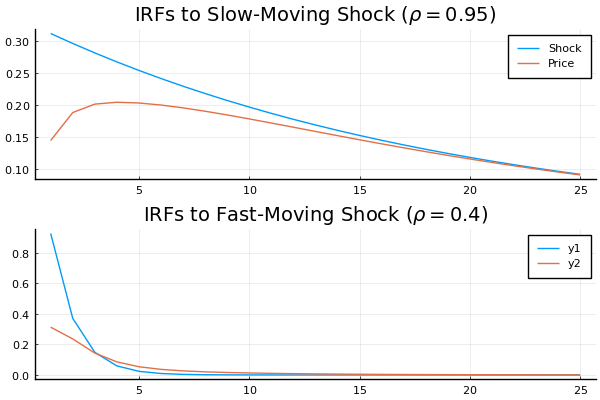

In [13]:
using Plots, LaTeXStrings; pyplot(); T  = 25;
pl1 = plot(1:T, [irfs_bp.x[1,1,:], irfs_bp.a[1,1,:]],
    title             = L"IRFs to Slow-Moving Shock ($\rho = 0.95$)",
    label             = ["Shock" "Price"])
pl2 = plot(1:T, [irfs_bp.x[2,2,:], irfs_bp.a[1,2,:]],
    title             = L"IRFs to Fast-Moving Shock ($\rho = 0.4$)")
pl = plot(pl1,pl2,layout = (2,1))

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Transition Dynamics of Attention</b>
</p>

In [14]:
p = Drip(ω,β,A,Q,H);

So far, we solved for steady state information structure. How about transition dynamics?

Suppose the initial belief is different from the Steady State belief: $\vec{x}_0\sim N(0,0)$

In [15]:
Σ_init  = [0 0; 0 0]
Tss     = 30; # guess for time until convergence
pt      = Trip(p, Σ_init; T = Tss);

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Transition Dynamics of Attention</b>
</p>

pt is of type Trip and stores the transition dynamics of information structure:

In [16]:
@doc pt

No documentation found.

`pt` is of type `Trip`.

# Summary

```
struct Trip <: Any
```

# Fields

```
p       :: Drip
T       :: Int32
Σ_1s    :: Array{Float64,3}
Σ_ps    :: Array{Float64,3}
Ωs      :: Array{Float64,3}
Ds      :: Array{Float64,2}
err     :: Float64
con_err :: Float64
```


<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Transition Dynamics of Attention</b>
</p>

In [17]:
using LinearAlgebra
@benchmark Trip(p, Σ; T = 30) setup = (Σ = Symmetric(rand(2,2)))

BenchmarkTools.Trial: 
  memory estimate:  474.59 KiB
  allocs estimate:  5114
  --------------
  minimum time:     411.261 μs (0.00% GC)
  median time:      434.656 μs (0.00% GC)
  mean time:        493.389 μs (10.97% GC)
  maximum time:     6.040 ms (87.67% GC)
  --------------
  samples:          10000
  evals/sample:     1

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Transition Dynamics of Attention</b>
</p>

In [18]:
pt.Σ_1s[:,:,1]

2×2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0

In [19]:
pt.Σ_1s[:,:,2]

2×2 Array{Float64,2}:
 0.0975  0.0
 0.0     0.86

In [20]:
pt.Σ_1s[:,:,3]

2×2 Array{Float64,2}:
  0.184409    -0.00332986
 -0.00332986   0.987377

In [21]:
pt.Σ_1s[:,:,end]

2×2 Array{Float64,2}:
  0.421633   -0.0672349
 -0.0672349   0.987124

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Transition Dynamics of Attention: Value of Information</b>
</p>

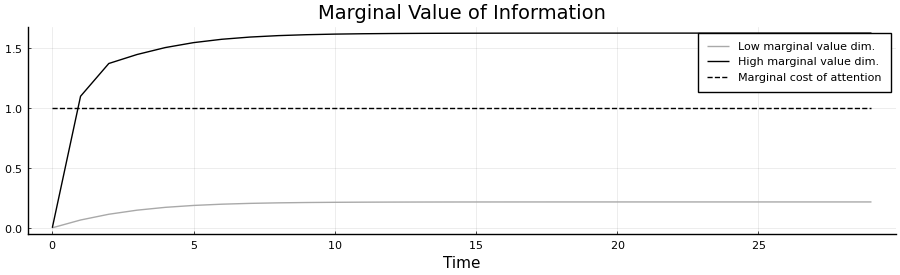

In [22]:
pl = plot(0:Tss-1,[pt.Ds[1,1:Tss],pt.Ds[2,1:Tss],pt.p.ω*ones(Tss,1)],
    label             = ["Low marginal value dim." "High marginal value dim." "Marginal cost of attention"],
    size              = (900,275),
    title             = "Marginal Value of Information",
    xlabel            = "Time",
    color             = [:darkgray :black :black],
    line              = [:solid :solid :dash])

<p style="font-family:Lato;font-size:140%;color:rgb(30,30,130);line-height:150%">
    <b> Transition Dynamics of Attention: IRFs</b>
</p>

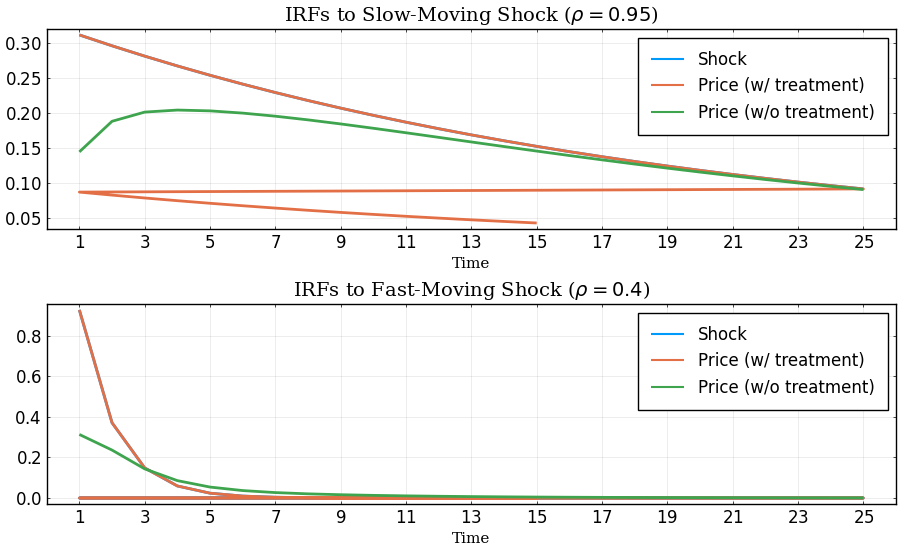

In [34]:
tirfs_bp = irfs(pt); # irfs on the transition path
p1 = plot(1:T, [irfs_bp.x[1,1,:], tirfs_bp.a[1,1,:], irfs_bp.a[1,1,:]],
    title             = L"IRFs to Slow-Moving Shock ($\rho = 0.95$)",
    label             = ["Shock" "Price (w/ treatment)" "Price (w/o treatment)"])
p2 = plot(1:T, [tirfs_bp.x[2,2,:], tirfs_bp.a[1,2,:], irfs_bp.a[1,2,:]],
    title             = L"IRFs to Fast-Moving Shock ($\rho = 0.4$)",
    label             = ["Shock" "Price (w/ treatment)" "Price (w/o treatment)"])
p = plot(p1,p2,
    layout     = (2,1),
    xlabel     = "Time",
    lw         = 2,
    xticks     = (1:2:T),
    xlim       = (0,T+1),
    fontfamily = "serif",
    legend     = :topright,
    legendfont = font(12),
    tickfont   = font(12),
    size       = (900,550),
    framestyle = :box)